## *Importing Important Library

In [1]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## * Reading Data .

In [2]:
df_churn = pd.read_csv(r"C:\Users\Manish kumar\Downloads\Churn_Modelling_data.csv")

In [3]:
df=df_churn.copy()

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape


(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### We are extracting Data types.

In [8]:
obj = []
num=[]

col= df.columns

for i in col:
    if df[i].dtype=='object':
        obj.append(i)
    else:
            num.append(i)
print('Object Columns\n')            
print(obj) 
print(len(obj))
print('*'*60)
print('Int Columns\n')
print(num)
print(len(num))

Object Columns

['Surname', 'Geography', 'Gender']
3
************************************************************
Int Columns

['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
11


##### We have 3 object and 11 which is not object.

In [9]:
len(df['RowNumber'].unique())

10000

In [10]:
len(df['CustomerId'].unique())

10000

In [11]:
len(df['Surname'].unique())

2932

###### We have Distinct Rownumber and CustomerId so we can drop Rownumber ,and also we don't need Surname so we can it drop it too.

In [12]:
df.drop(columns=['RowNumber','Surname'], inplace=True )

### We can set CustomerId as index.

In [13]:
df.set_index(["CustomerId"], inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking Null values

In [15]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### We dont have any null values.

In [16]:
obj = []
num=[]

col= df.columns

for i in col:
    if df[i].dtype=='object':
        obj.append(i)
    else:
            num.append(i)
print('Object Columns\n')            
print(obj) 
print(len(obj))
print('*'*60)
print('Int Columns\n')
print(num)
print(len(num))

Object Columns

['Geography', 'Gender']
2
************************************************************
Int Columns

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
9


In [17]:
def object_cat(data,x):              
    value=data[x].value_counts()
    unique= data[x].unique()
    print('Values:\n',value,'\n')
    print('Unique:\n',unique)
    
    sns.countplot(data=data,x=x)
   
    plt.show()

Values:
 France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64 

Unique:
 ['France' 'Spain' 'Germany']


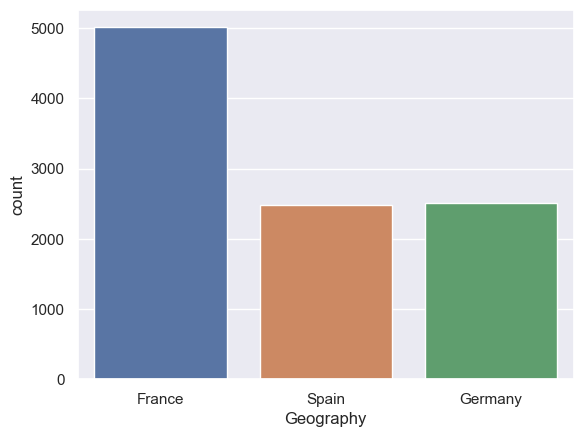

In [18]:
object_cat(data= df, x='Geography')

Values:
 Male      5457
Female    4543
Name: Gender, dtype: int64 

Unique:
 ['Female' 'Male']


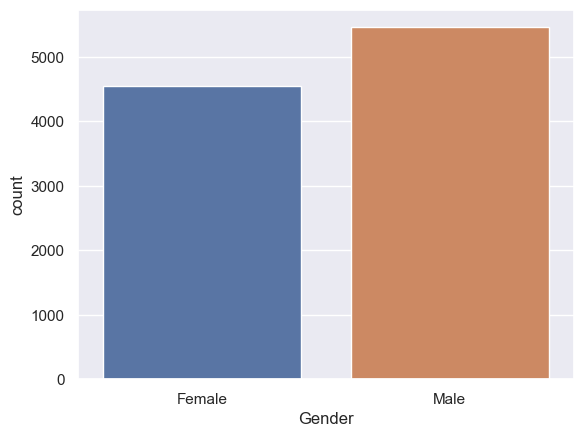

In [19]:
object_cat(data= df, x='Gender')

Values:
 2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64 

Unique:
 [ 2  1  8  7  4  6  3 10  5  9  0]


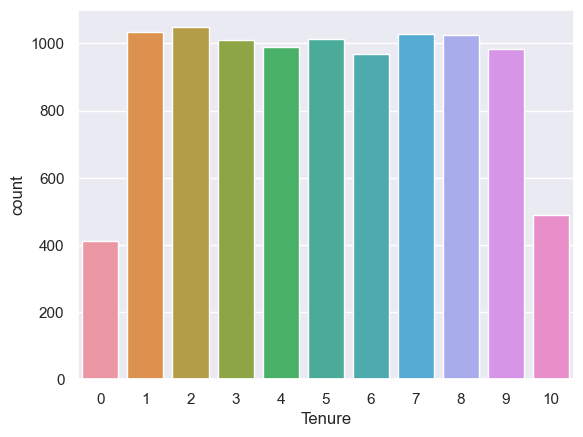

In [20]:
object_cat(data= df, x='Tenure')

Values:
 1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64 

Unique:
 [1 3 2 4]


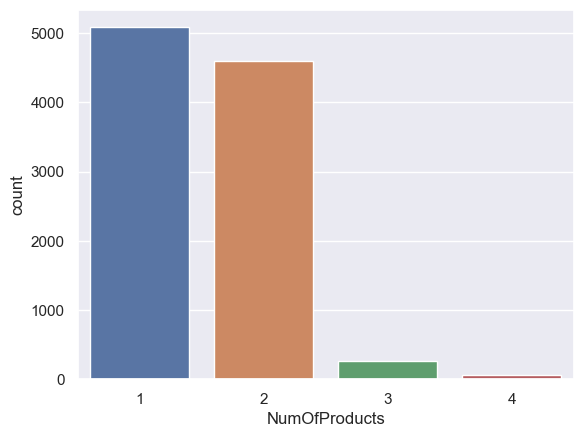

In [21]:
object_cat(data= df, x='NumOfProducts')

Values:
 1    7055
0    2945
Name: HasCrCard, dtype: int64 

Unique:
 [1 0]


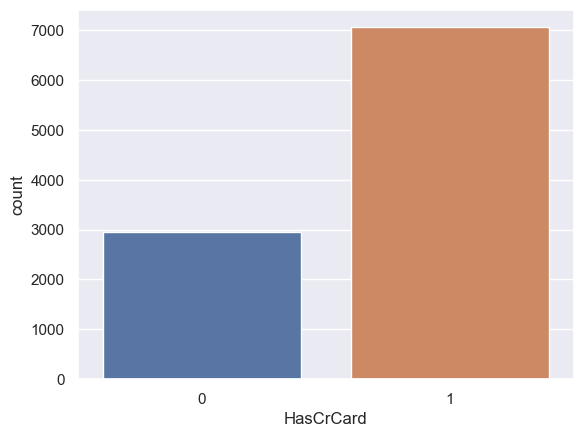

In [22]:
object_cat(data=df, x='HasCrCard')

Values:
 1    5151
0    4849
Name: IsActiveMember, dtype: int64 

Unique:
 [1 0]


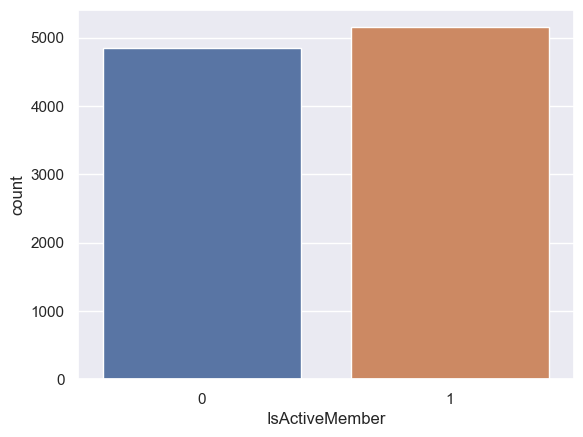

In [23]:
object_cat(data=df, x='IsActiveMember')

In [24]:
def object_cat_hue(data,x,hue):              
    value=data[x].value_counts()
    unique= data[x].unique()
    print('Values:\n',value,'\n')
    print('Unique:\n',unique)
    print('***************************************************************')
    value_hue=data[hue].value_counts()
    unique_hue= data[hue].unique()
    print('Values:\n',value_hue,'\n')
    print('Unique:\n',unique_hue)
    
    sns.countplot(data=data,x=x,hue=hue)
   
    plt.show()

### We can check how many active member are male and female

Values:
 1    5151
0    4849
Name: IsActiveMember, dtype: int64 

Unique:
 [1 0]
***************************************************************
Values:
 Male      5457
Female    4543
Name: Gender, dtype: int64 

Unique:
 ['Female' 'Male']


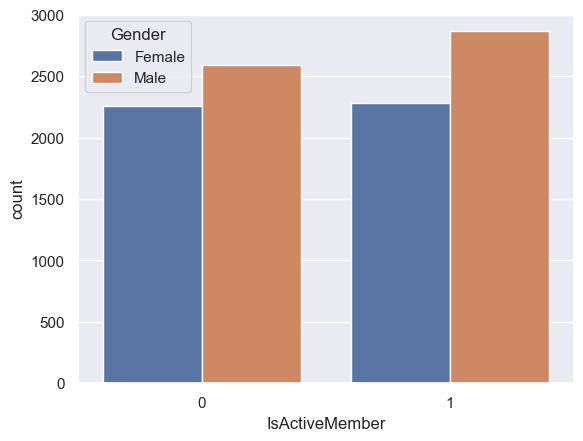

In [25]:

object_cat_hue(data= df, x='IsActiveMember',hue='Gender' )

###### we can see the ratio of male and female member who is active or not.

### We can check the ratio of gender who is from which Geography.

Values:
 France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64 

Unique:
 ['France' 'Spain' 'Germany']
***************************************************************
Values:
 Male      5457
Female    4543
Name: Gender, dtype: int64 

Unique:
 ['Female' 'Male']


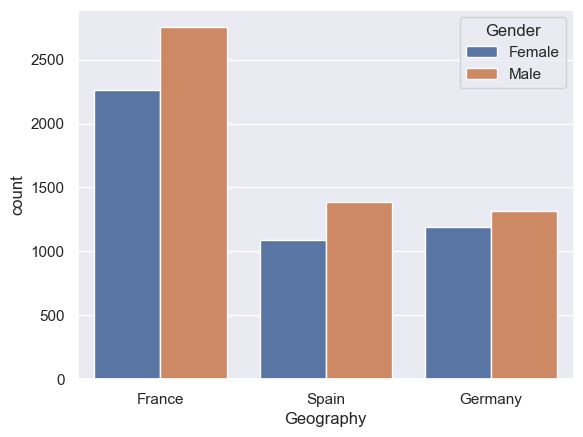

In [26]:
object_cat_hue(data= df, x='Geography',hue='Gender' )

##### we can see the ratio of male and female member who is from which Geography.

Values:
 0    7963
1    2037
Name: Exited, dtype: int64 

Unique:
 [1 0]


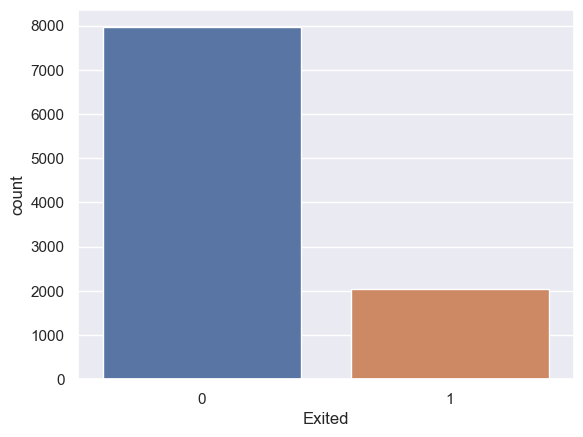

In [27]:
object_cat(data= df, x ='Exited')

In [28]:
print('Not Exited:',(len(df[df.Exited==0])/len(df.Exited)*100),'%')

print('**********************************************************************')

print('Not Exited:',(len(df[df.Exited==1])/len(df.Exited)*100),'%')

Not Exited: 79.63 %
**********************************************************************
Not Exited: 20.369999999999997 %


#### We can see there 79.6% member who is Exited abd 20.4% memeber who dont Exited. 

### I can check the ratio of gender with exited 

Values:
 Male      5457
Female    4543
Name: Gender, dtype: int64 

Unique:
 ['Female' 'Male']
***************************************************************
Values:
 0    7963
1    2037
Name: Exited, dtype: int64 

Unique:
 [1 0]


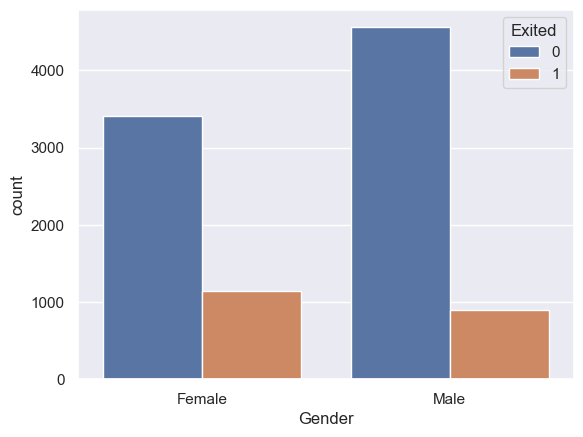

In [29]:
object_cat_hue(data= df, x='Gender', hue='Exited')

##### We can see the the ratio of gender who is exited of not  

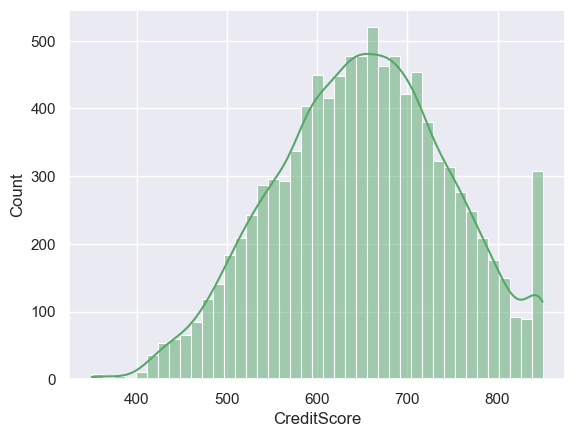

In [30]:
sns.histplot(df.CreditScore, kde=True,color='g')
plt.show()

#### Most of credit score are lies between 600 and 750.

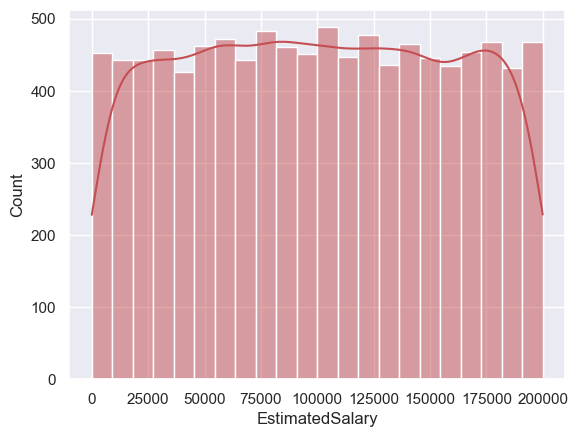

In [31]:
sns.histplot(df.EstimatedSalary, kde=True,color='r')
plt.show()

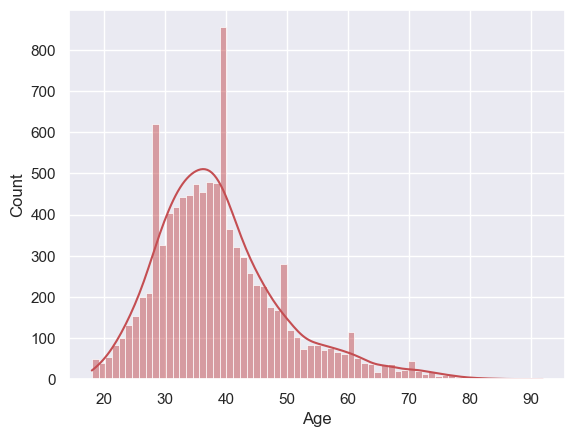

In [32]:
sns.histplot(df.Age, kde=True,color='r')
plt.show()

### We can give a range of Credit Score and Age.

In [33]:
def credit(x):
    if x<722:
        return "VeryLowCredit"
    elif x >=722 and x<=747:
        return "LowCredit"
    elif x >747 and x <765:
        return "GoodCredit"
    elif x>=765 and x<=777:
        return "VeryGoodCredit"
    else:
        return "ExcellentCredit"

In [34]:
df["CreditScore_cat"]=df["CreditScore"].apply(credit)

In [35]:
df.Age.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
10%         27.000000
20%         31.000000
30%         33.000000
40%         35.000000
50%         37.000000
60%         40.000000
70%         42.000000
80%         46.000000
90%         53.000000
99%         72.000000
max         92.000000
Name: Age, dtype: float64

In [36]:
df.Age.max()

92

In [37]:
df.Age.min()

18

In [38]:
df.Age.mean()

38.9218

In [39]:
def age(x):
    if x<30:
        return "youngAdult"
    elif x>=30 and x<50:
        return "Adult"
    elif x>=50 and x<65:
        return "AeniorAdult"
    else :
        return "Seniors_65+"

In [40]:
df["Age_cat"]=df["Age"].apply(age)

In [41]:
df.describe(percentiles=[.01,.02,.3,.4,.5,.6,.7,.8,.98,.99]).T

,count,mean,std,min,1%,2%,30%,40%,50%,60%,70%,80%,98%,99%,max
CreditScore,10000.0,650.528800,96.653299,350.00,432.0000,452.0000,598.700,627.000,652.000,678.000,704.000,735.000,850.0000,850.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,21.0000,22.0000,33.000,35.000,37.000,40.000,42.000,46.000,67.0000,72.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,0.0000,0.0000,3.000,4.000,5.000,6.000,7.000,8.000,10.0000,10.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.0000,0.0000,0.000,73080.908,97198.540,110138.926,122029.870,133710.358,176915.6732,185967.9854,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.0000,1.0000,1.000,1.000,1.000,2.000,2.000,2.000,3.0000,3.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.0000,0.0000,1.000,1.000,1.000,1.000,1.000,1.000,1.0000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.0000,0.0000,0.000,0.000,1.000,1.000,1.000,1.000,1.0000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,1842.8253,3769.4488,60736.079,80238.340,100193.915,119710.038,139432.236,159836.726,196278.5228,198069.7345,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,1.000,1.0000,1.0000,1.00


In [42]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [43]:
df['Gender']= df['Gender'].map({'Male':1,'Female':0})

In [44]:
obj = []
num=[]

col= df.columns

for i in col:
    if df[i].dtype=='object':
        obj.append(i)
    else:
            num.append(i)
print('Object Columns\n')            
print(obj) 
print(len(obj))
print('*'*60)
print('Int Columns\n')
print(num)
print(len(num))

Object Columns

['Geography', 'CreditScore_cat', 'Age_cat']
3
************************************************************
Int Columns

['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
10


In [45]:
df.drop(columns=['Age','CreditScore'], inplace=True)

##### We droped Age and Credit Score we already created a new columns .

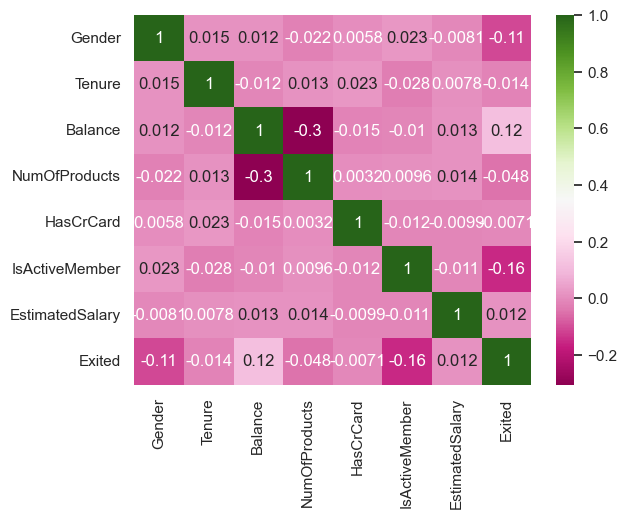

In [96]:
sns.heatmap(df.corr(), annot=True, cmap='PiYG')
plt.show()

#### We don't have any strong correllated columns each other.

In [47]:
df.head()

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_cat,Age_cat
CustomerId,,,,,,,,,,,
15634602,France,0,2,0.00,1,1,1,101348.88,1,VeryLowCredit,Adult
15647311,Spain,0,1,83807.86,1,0,1,112542.58,0,VeryLowCredit,Adult
15619304,France,0,8,159660.80,3,1,0,113931.57,1,VeryLowCredit,Adult
15701354,France,0,1,0.00,2,0,0,93826.63,0,VeryLowCredit,Adult
15737888,Spain,0,2,125510.82,1,1,1,79084.10,0,ExcellentCredit,Adult


In [48]:
churn_data=df.to_csv('churn_data.csv', index=False)

In [49]:
all_df=pd.get_dummies(df,drop_first=True)

In [50]:
all_df.shape

(10000, 17)

In [51]:
all_df.head()

,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,CreditScore_cat_GoodCredit,CreditScore_cat_LowCredit,CreditScore_cat_VeryGoodCredit,CreditScore_cat_VeryLowCredit,Age_cat_AeniorAdult,Age_cat_Seniors_65+,Age_cat_youngAdult
CustomerId,,,,,,,,,,,,,,,,,
15634602,0,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,1,0,0,0
15647311,0,1,83807.86,1,0,1,112542.58,0,0,1,0,0,0,1,0,0,0
15619304,0,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,1,0,0,0
15701354,0,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,1,0,0,0
15737888,0,2,125510.82,1,1,1,79084.10,0,0,1,0,0,0,0,0,0,0


### Our dependent variable is Exited 

In [52]:
y= all_df["Exited"]
x=all_df.drop(columns=["Exited"])

### Importing important Library for model selection.

In [53]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, precision_recall_curve


In [54]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.3, random_state=88)

In [55]:
dt = DecisionTreeClassifier()

In [56]:
dt.fit(x_train,y_train)
print("Train score", dt.score(x_train, y_train))
print("Test score", dt.score(x_test, y_test))

Train score 1.0
Test score 0.7763333333333333


### We should apply GridSearchCv for best result

In [57]:
params={"max_depth":[7,9,11], 
       "min_samples_leaf":[10,20,30,50,100],
       "min_samples_split":[5,10,20,30],
       "criterion":["gini", "entropy"]}

In [58]:
dt0=DecisionTreeClassifier(random_state=0)
gsearch_tr=GridSearchCV(dt0, param_grid=params, cv=5, n_jobs=-1, verbose=2)
gsearch_tr.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11],
                         'min_samples_leaf': [10, 20, 30, 50, 100],
                         'min_samples_split': [5, 10, 20, 30]},
             verbose=2)

In [59]:
gsearch_tr.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 100,
 'min_samples_split': 5}

In [60]:
gsearch_tr.best_score_

0.8497142857142856

In [61]:
gsearch_tr.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=100, min_samples_split=5,
                       random_state=0)

In [62]:
gsearch_tr.classes_

array([0, 1], dtype=int64)

#### Now we can apply best params in our new model
## Decision Tree

In [63]:
dt1=DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=100,
                       min_samples_split=5, random_state=88)
dt1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=100, min_samples_split=5,
                       random_state=88)

In [64]:
print("Train score", dt1.score(x_train, y_train))
print("Test score", dt1.score(x_test, y_test))

Train score 0.8517142857142858
Test score 0.844


In [65]:
bg=BaggingClassifier(base_estimator=dt1, n_estimators=300 )
bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,
                                                        min_samples_leaf=100,
                                                        min_samples_split=5,
                                                        random_state=88),
                  n_estimators=300)

In [66]:
print("Train score", bg.score(x_train, y_train))
print("Test score", bg.score(x_test, y_test))

Train score 0.8517142857142858
Test score 0.846


#### We can predict now.

In [67]:
pred_train=dt1.predict(x_train)
pred_test=dt1.predict(x_test)

#### We can create confusion matrix for better understanding.

In [68]:
cm=pd.DataFrame(confusion_matrix(y_train, pred_train),columns=["Pred_NoExisted0", "Pred_Exited1"], index=["Act_NoExited0", "Act_Exited1"])
cm

,Pred_NoExisted0,Pred_Exited1
Act_NoExited0,5423,136
Act_Exited1,902,539


In [69]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      5559
           1       0.80      0.37      0.51      1441

    accuracy                           0.85      7000
   macro avg       0.83      0.67      0.71      7000
weighted avg       0.85      0.85      0.83      7000



## RandomForest Classifier

In [70]:
params={"n_estimators":[100,200,300],
       "criterion":["gini", "entropy"],
       "min_samples_split":[10,20,50],
       "min_samples_leaf":[5,10,30],
        "max_features":["sqrt", "log2"]
       }

In [71]:
rf=RandomForestClassifier(random_state=0)

In [72]:
gsearch_rf=GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1, verbose=2)
gsearch_rf.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 30],
                         'min_samples_split': [10, 20, 50],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [73]:
gsearch_rf.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 200}

In [74]:
gsearch_rf.best_score_

0.8482857142857144

In [75]:
rf1=RandomForestClassifier(n_estimators=200,criterion="entropy",max_features="sqrt", min_samples_leaf=5, min_samples_split=20, random_state=0)
rf1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=20,
                       n_estimators=200, random_state=0)

In [76]:
print("Train score", rf1.score(x_train, y_train))
print("Test score", rf1.score(x_test, y_test))

Train score 0.8697142857142857
Test score 0.847


In [77]:
pred_train_rf=rf1.predict(x_train)
pred_test_rf=rf1.predict(x_test)

In [78]:
cm1=pd.DataFrame(confusion_matrix(y_train, pred_train_rf),columns=["Pred_NoExisted0", "Pred_Exited1"], index=["Act_NoExited0", "Act_Exited1"])
cm1

,Pred_NoExisted0,Pred_Exited1
Act_NoExited0,5469,90
Act_Exited1,822,619


In [79]:
print(classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      5559
           1       0.87      0.43      0.58      1441

    accuracy                           0.87      7000
   macro avg       0.87      0.71      0.75      7000
weighted avg       0.87      0.87      0.85      7000



### Adaboost Classifier

In [80]:
ad=AdaBoostClassifier(base_estimator=rf1,n_estimators=100,learning_rate=.01,)
ad.fit(x_train, y_train)


AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         max_features='sqrt',
                                                         min_samples_leaf=5,
                                                         min_samples_split=20,
                                                         n_estimators=200,
                                                         random_state=0),
                   learning_rate=0.01, n_estimators=100)

In [81]:
print("Train score", ad.score(x_train, y_train))
print("Test score", ad.score(x_test, y_test))

Train score 0.8807142857142857
Test score 0.849


## XGBoost Classifier

In [82]:
xg=XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [83]:
params={"n_estimators":[100, 200],
       "max_depth":[7,9,11]}

In [84]:
xg1=XGBClassifier(random_state=0)
gsearch_xg=GridSearchCV(xg1, param_grid=params, cv=5, n_jobs=-1,verbose=2)
gsearch_xg.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max

In [85]:
gsearch_xg.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [86]:
xg1=XGBClassifier(n_estimators=100, max_depth=7)
xg1.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [87]:
print("Train score", xg1.score(x_train, y_train))
print("Test score", xg1.score(x_test, y_test))

Train score 0.9584285714285714
Test score 0.836


## We can collect the all models performance

In [88]:
def eval(model, xtrain, ytrain, xtest, ytest):
    acc=model.score(xtrain, ytrain)
    pred_train=model.predict(xtrain)
    rec=recall_score(ytrain, pred_train)
    prec=precision_score(ytrain, pred_train)
    
    acctest=model.score(xtest, ytest)
    pred_test=model.predict(xtest)
    rec_test=recall_score(ytest, pred_test)
    prec_test=precision_score(ytest, pred_test)
    final={"train_accuracy":acc, "test_accuracy":acctest, "train_recall":rec,"test_recal":rec_test,
           "train_precision":prec,"test_precision":prec_test
          }
    return final

In [89]:
dt_result=pd.DataFrame(eval(dt1, x_train, y_train, x_test, y_test), index=["DecisionTree_hyp"])
dt_result

,train_accuracy,test_accuracy,train_recall,test_recal,train_precision,test_precision
DecisionTree_hyp,0.851714,0.844,0.374046,0.348993,0.798519,0.722222


In [90]:
bg_result=pd.DataFrame(eval(bg, x_train, y_train, x_test, y_test), index=["Bagging"])
bg_result

,train_accuracy,test_accuracy,train_recall,test_recal,train_precision,test_precision
Bagging,0.851714,0.846,0.37127,0.347315,0.802099,0.739286


In [91]:
rf_result=pd.DataFrame(eval(rf1, x_train, y_train, x_test, y_test), index=["RndomForest"])
rf_result

,train_accuracy,test_accuracy,train_recall,test_recal,train_precision,test_precision
RndomForest,0.869714,0.847,0.429563,0.352349,0.873061,0.742049


In [92]:
ad_result=pd.DataFrame(eval(ad, x_train, y_train, x_test, y_test), index=["Adaboost"])
ad_result

,train_accuracy,test_accuracy,train_recall,test_recal,train_precision,test_precision
Adaboost,0.880714,0.849,0.477446,0.36745,0.893506,0.742373


In [93]:
xg_result=pd.DataFrame(eval(xg1, x_train, y_train, x_test, y_test), index=["XGboost_hyp"])
xg_result

,train_accuracy,test_accuracy,train_recall,test_recal,train_precision,test_precision
XGboost_hyp,0.958429,0.836,0.814018,0.442953,0.980769,0.622642


In [94]:
final=pd.concat([xg_result, rf_result, dt_result,ad_result,bg_result])
final.style.highlight_max(color="green")

,train_accuracy,test_accuracy,train_recall,test_recal,train_precision,test_precision
XGboost_hyp,0.958429,0.836000,0.814018,0.442953,0.980769,0.622642
RndomForest,0.869714,0.847000,0.429563,0.352349,0.873061,0.742049
DecisionTree_hyp,0.851714,0.844000,0.374046,0.348993,0.798519,0.722222
Adaboost,0.880714,0.849000,0.477446,0.367450,0.893506,0.742373
Bagging,0.851714,0.846000,0.371270,0.347315,0.802099,0.739286


### We can see , we have appiled 5 models and then we got some better result form models which are given above in the table . 
### Our best model is XGboost_hyp 